# Nonstandard standard error

In [39]:
%matplotlib inline

import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

np.random.seed(123)

## Intraclass correlation coefficient

In [43]:
columns = ['Y', 'G', 'E']
index = pd.Index(range(50), name='Identifier')
df = pd.DataFrame(columns=columns, index=index)

i = 0
for g in range(10):
    nu = np.random.normal()
    for n in range(5):
        eta = np.random.normal()
        e = nu + eta

        y = g + e
        df.loc[i, :] = [y, g, e]
        
        i += 1

df = df.astype(np.float)

Now we can look at the realizations by group.

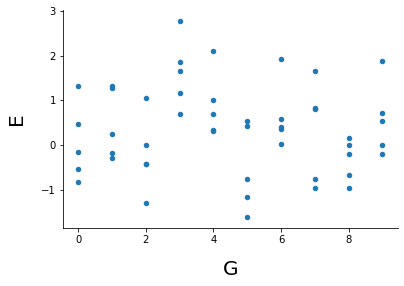

In [45]:
df.plot.scatter(x='G', y='E')

# Krueger (1999)

* Krueger, Alan B. (1990) Experimental estimates of education production functions, Quarterly Journal of Economics, 

In [46]:
df_base = pd.read_csv('../../datasets/processed/angrist_pischke/webstar.csv')
df_base.sample(5)

,schidkn,pscore,classid,cs,female,nwhite,n
5464,22,96.126860,6317.0,15.0,1.0,1.0,1.0
381,45,9.065136,13300.0,24.0,0.0,1.0,1.0
5229,1,85.498030,100.0,14.0,1.0,0.0,1.0
426,57,7.793530,16853.0,12.0,1.0,1.0,1.0
3443,19,53.856544,5416.0,16.0,0.0,1.0,1.0


## How many different classes do we have?

In [47]:
df_base['classid'].nunique()

318

## How does the distribution of class size look like?

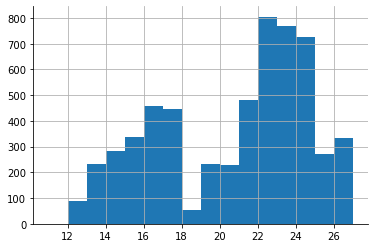

In [48]:
df_base['cs'].hist(bins=range(11, 28));

## What are the basic features of class size?

In [49]:
df_base.groupby('classid')['cs'].mean().describe()

count    318.000000
mean      19.424528
std        4.138642
min       12.000000
25%       16.000000
50%       20.000000
75%       23.000000
max       27.000000
Name: cs, dtype: float64

## How does the distribution of test scores look like?

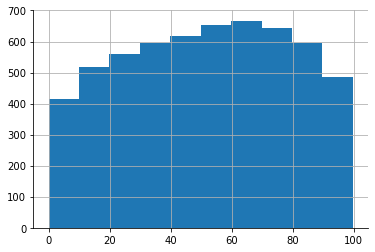

In [50]:
df_base['pscore'].hist()

## How do test scores vary overall?

In [51]:
df_base['pscore'].std()

27.05999628737241

## How do test scores vary within class?

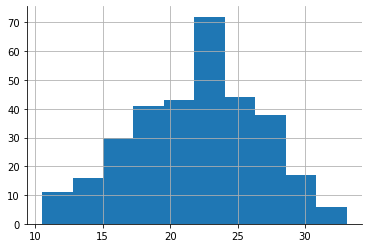

In [52]:
df_base.groupby('classid')['pscore'].std().hist()

## Is there a relationship between class size and scores?

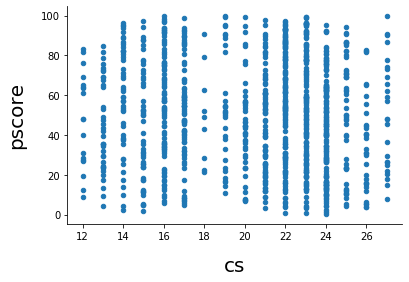

In [63]:
df_base.sample(1000).plot.scatter(x='cs', y='pscore')

In [64]:
formula = 'pscore ~ cs'
rslt = smf.ols(formula=formula, data=df_base).fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pscore   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     47.39
Date:                 Mo, 24 Jun 2019   Prob (F-statistic):           6.44e-12
Time:                        16:15:04   Log-Likelihood:                -27066.
No. Observations:                5743   AIC:                         5.414e+04
Df Residuals:                    5741   BIC:                         5.415e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.0666      1.855     34.536      0.000      60.430      67.703
cs            -0.6180      0.090     -6.884      0.000      -0.794      -0.442
==============================================================================
Omnibus:                     2351.698   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.870
Skew:                          -0.070   Prob(JB):                     9.33e-65
Kurtosis:                       1.899   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## What is the intraclass correlation factor?

We will use this an example to illustrate the interfacing between **R** and **Python**.

In [65]:
from rpy2.robjects import DataFrame, FloatVector, IntVector
from rpy2.robjects.packages import importr

r_icc = importr("ICC")
df = DataFrame({"groups": IntVector(df_base['classid']),
                "values": FloatVector(rslt.resid.values)})
rslt = r_icc.ICCbare("groups", "values", data=df)[0]
print('intraclass correlation factor {:5.3f}'.format(rslt))

intraclass correlation factor 0.311


In [66]:
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen('http://bit.ly/2DeuEQx')
HTML(html.read().decode('utf-8'))

In [67]:
%load_ext rpy2.ipython

[autoreload of numpy.core.multiarray failed: Traceback (most recent call last):
  File "/home/peisenha/.local/share/anaconda3/envs/teaching_microeconometrics/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/peisenha/.local/share/anaconda3/envs/teaching_microeconometrics/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/home/peisenha/.local/share/anaconda3/envs/teaching_microeconometrics/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/peisenha/.local/share/anaconda3/envs/teaching_microeconometrics/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_w

ModuleNotFoundError: No module named 'tzlocal'